<div class="alert alert-block alert-success">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

Olá Filipe. Meu nome é Felipe Coutinho. Fico feliz em analisar o seu projeto final. Primeiramente gostaria de parabenizá-lo por chegar até aqui, sei que foi uma longa jornada, com muitos aprendizados e desafios! Vou analisar a parte inicial do projeto e pontuar alguns feedbacks
</div>

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK. Grande parte do trabalho já tinha sido revisado na etapa anterior. Tirando alguns warnings, pontuação ROC foi atingida.
</div>

# Projeto Final – Telecomunicação

A operadora de comunicações Interconnect gostaria de ser capaz de predizer a rotatividade de seus clientes. Se for descoberto que um usuário está planejando trocar de operadora, a empresa oferecerá-lhe códigos promocionais e opções de plano especiais. A equipe de marketing da Interconnect coletou alguns dados pessoais da sua clientela, incluindo a informação sobre seus planos e contratos.

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

## Qual a "dor" da Interconnect a ser resolvida?

A dor a ser solucionada é a ameaça de rotatividade de clientes, que impacta a receita e a lucratividade da empresa. A aquisição de novos clientes geralmente é mais onerosa do que a manutenção dos clientes existentes. Portanto, a Interconnect busca prever com precisão a rotatividade para tomar medidas proativas, oferecendo incentivos personalizados para manter os clientes satisfeitos e engajados.

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

## Qual é o objetivo?

O objetivo da Interconnect é desenvolver modelos preditivos para identificar padrões ou sinais de alerta que indiquem quando um cliente está considerando cancelar seus serviços. Isso permitirá à empresa tomar medidas preventivas e estratégicas para reter seus clientes, aumentando a satisfação, receita e lucratividade.

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

## Escopo do Projeto de Previsão de Churn para a Interconnect

**Dados Disponíveis:**

- Os dados estão disponíveis em quatro arquivos: `contract.csv`, `personal.csv`, `internet.csv` e `phone.csv`.
- A coluna `EndDate` contém informações sobre a data de saída dos clientes, com "No" indicando clientes ativos.

**Pré-processamento de Dados:**

- Tratar valores ausentes, converter a colunas para o tipo correto, tratando valores inconsistentes.

**Análise Exploratória de Dados (EDA):**

- Fazer a EDA focada exclusivamente no Churn.

**Feature Engineering:**

- Criar características relevantes, se possível.
- Codificar variáveis categóricas usando técnicas apropriadas, como codificação one-hot ou label encoding.

**Modelagem Preditiva:**

- Selecionar  um dos algoritmos de classificação adequados, como Regressão Logística, Árvores de Decisão, Random Forest ou Gradient Boosting, para criar modelos de previsão de churn, o objetivo é atigir a meta mínima de score no AUC-ROC.

**Limitações:**

- Eu tenho um prazo de poucos dias para o projeto, limitando a otimização extensiva de modelos e análises aprofundadas.
- Dados ausentes e inconsistências nos valores devem ser tratados de forma apropriada.
- O foco principal é atender às metas de AUC-ROC, e realizar uma EDA foca no churn.

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

## Inicialização

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

## Carregar Dados

In [3]:
try:
    df = pd.read_csv('/datasets/final_provider/contract.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')
except:
    df = pd.read_csv('contract.csv')
    personal = pd.read_csv('personal.csv')
    internet = pd.read_csv('internet.csv')
    phone = pd.read_csv('phone.csv')

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

In [4]:
dfs_merge = [personal, internet, phone]

for df_merge in dfs_merge:
    df = df.merge(df_merge, on='customerID', how='left')

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

## Train-Test-Split

In [5]:
SEED = 42

In [6]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=SEED)
df_train.shape, df_test.shape

((5634, 20), (1409, 20))

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

## Análise Exploratória de Dados (EDA)

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK. EDA já foi revisada na etapa anterior.
</div>

In [7]:
df_train.head(20)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
2142,4223-BKEOR,2018-05-01,No,One year,No,Mailed check,64.85,1336.8,Female,0,No,Yes,DSL,Yes,No,Yes,No,No,Yes,No
1623,6035-RIIOM,2015-08-01,No,Two year,Yes,Bank transfer (automatic),97.20,5129.45,Female,0,No,No,Fiber optic,No,Yes,No,No,Yes,Yes,Yes
6074,3797-VTIDR,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,23.45,23.45,Male,0,Yes,No,DSL,No,No,No,No,No,No,NaN
1362,2568-BRGYX,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.20,237.95,Male,0,No,No,Fiber optic,No,No,No,No,No,No,No
6754,2775-SEFEE,2020-02-01,No,Two year,Yes,Bank transfer (automatic),61.90,,Male,0,No,Yes,DSL,Yes,Yes,No,Yes,No,No,Yes
1212,4291-SHSBH,2019-07-01,No,Month-to-month,Yes,Electronic check,69.55,521.35,Male,0,No,No,Fiber optic,No,No,No,No,No,No,No
2722,4635-EJYPD,2017-06-01,No,Two year,No,Mailed check,18.95,613.95,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4006,2607-DHDAK,2014-02-01,No,Two year,Yes,Credit card (automatic),19.80,1414.65,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6791,5204-QZXPU,2018-05-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,39.65,733.35,Male,0,No,No,DSL,No,No,Yes,No,Yes,No,NaN
5466,0221-NAUXK,2019-04-01,No,One year,Yes,Bank transfer (automatic),19.95,219.5,Male,0,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [8]:
df_train.tail()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
3772,0684-AOSIH,2019-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Electronic check,95.00,95,Male,0,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,No
5191,5982-PSMKW,2018-03-01,No,Two year,Yes,Credit card (automatic),91.10,2198.3,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5226,8044-BGWPI,2019-02-01,No,Month-to-month,Yes,Electronic check,21.15,306.05,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5390,7450-NWRTR,2018-12-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,99.45,1200.15,Male,1,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
860,4795-UXVCJ,2017-12-01,No,One year,No,Credit card (automatic),19.80,457.3,Male,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   BeginDate         5634 non-null   object 
 2   EndDate           5634 non-null   object 
 3   Type              5634 non-null   object 
 4   PaperlessBilling  5634 non-null   object 
 5   PaymentMethod     5634 non-null   object 
 6   MonthlyCharges    5634 non-null   float64
 7   TotalCharges      5634 non-null   object 
 8   gender            5634 non-null   object 
 9   SeniorCitizen     5634 non-null   int64  
 10  Partner           5634 non-null   object 
 11  Dependents        5634 non-null   object 
 12  InternetService   4420 non-null   object 
 13  OnlineSecurity    4420 non-null   object 
 14  OnlineBackup      4420 non-null   object 
 15  DeviceProtection  4420 non-null   object 
 16  TechSupport       4420 non-null   object

In [10]:
df_train.isnull().sum()/len(df_train)

customerID          0.000000
BeginDate           0.000000
EndDate             0.000000
Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
InternetService     0.215477
OnlineSecurity      0.215477
OnlineBackup        0.215477
DeviceProtection    0.215477
TechSupport         0.215477
StreamingTV         0.215477
StreamingMovies     0.215477
MultipleLines       0.097977
dtype: float64

## Pré-Processamento de Dados

Vamos identificar se os dados ausentes originam-se nos dataframes individuais.

In [11]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [13]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


**Conclusão Inicial**

Ao observarmos a integridade dos dados nas bases originais, podemos concluir que os dados ausentes surgiram devido à operação do merge. É provável que o campo `customerID` não tenha sido encontrado na fusão, o que resultou no preenchimento desses valores ausentes como `NaN` (Not-a-Number).

In [14]:
def convert_totalcharges(df):
    """
    Converte a coluna 'TotalCharges' para numérico e preenche valores ausentes com a mediana.
    """
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
    return df


def fill_na_values(df):
    """
    Preenche valores ausentes das colunas especificadas com "No".
    """
    columns_to_fill = [
        'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'MultipleLines'
    ]
    df[columns_to_fill] = df[columns_to_fill].fillna('No')
    return df


def convert_begindate(df):
    """
    Converte a coluna 'BeginDate' para datetime.
    """
    df['BeginDate'] = pd.to_datetime(df['BeginDate'])
    return df


def convert_seniorcitizen(df):
    """
    Converte a coluna 'SeniorCitizen' para booleano.
    """
    df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
    return df


def map_boolean_columns(df):
    """
    Mapeia as colunas especificadas para valores booleanos.
    """
    boolean_columns = [
        'PaperlessBilling', 'Dependents', 'Partner', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'MultipleLines'
    ]
    for col in boolean_columns:
        df[col] = df[col].map({'Yes': True, 'No': False}).astype(bool)
    return df


def map_category_columns(df):
    """
    Mapeia as colunas especificadas para valores categóricos.
    """
    category_columns = ['Type', 'PaymentMethod', 'gender', 'InternetService']
    for col in category_columns:
        df[col] = df[col].astype('category')
    return df


def recreate_target(df):
    """
    Cria a coluna 'Churn' como um valor booleano para ser a target.
    """
    df['Churn'] = df['EndDate'] != 'No'
    return df


def preprocess_data(df):
    """
    Pré-processa o DataFrame fornecido.
    """
    df = convert_totalcharges(df)
    df = fill_na_values(df)
    df = convert_begindate(df)
    df = convert_seniorcitizen(df)
    df = map_boolean_columns(df)
    df = map_category_columns(df)
    df = recreate_target(df)
    return df


df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        5634 non-null   object        
 1   BeginDate         5634 non-null   datetime64[ns]
 2   EndDate           5634 non-null   object        
 3   Type              5634 non-null   category      
 4   PaperlessBilling  5634 non-null   bool          
 5   PaymentMethod     5634 non-null   category      
 6   MonthlyCharges    5634 non-null   float64       
 7   TotalCharges      5634 non-null   float64       
 8   gender            5634 non-null   category      
 9   SeniorCitizen     5634 non-null   bool          
 10  Partner           5634 non-null   bool          
 11  Dependents        5634 non-null   bool          
 12  InternetService   5634 non-null   category      
 13  OnlineSecurity    5634 non-null   bool          
 14  OnlineBackup      5634

## Conclusão

- Implementamos a função `convert_totalcharges`, a qual converte a coluna `TotalCharges` de string para o tipo float e preenche os valores nulos com a mediana correspondente.

- Criamos a função `fill_na_values` para preencher as colunas que possuem valores ausentes devido à falta de correspondência com o `customerID` durante a fusão do merge. Nesse caso, assumimos que esses clientes com valores nulos não possuem os serviços e, portanto, preenchemos esses valores com 'No'.

- Desenvolvemos a função `convert_begindate` para transformar a coluna `BeginDate` em um formato datetime.

- Implementamos a função `convert_seniorcitizen` para converter a coluna `SeniorCitizen` em valores booleanos.

- Criamos a função `map_boolean_columns` para converter as colunas que possuem valores que variam entre 'Yes' e 'No' para booleanos. Essa abordagem melhora a eficiência computacional e mantém todas as informações relevantes.

- Implementamos a função `map_category_columns` para converter as colunas em formato categórico.

- Criamos a função `recreate_target` para gerar uma nova coluna que identifica quais clientes realizaram o churn. Isso é feito porque a coluna `EndDate` estava misturada com informações de churn e, ao criar uma coluna booleana de destino, facilitamos a filtragem e a previsão de modelos.

- Implementamos a função `preprocess_data` como a função principal que chama todas as outras funções de pré-processamento para manipular o DataFrame.

- Aplicamos todos esses procedimentos de pré-processamento aos conjuntos de treinamento e teste.

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

##  Análise Exploratória de Dados 

In [16]:
max_date = pd.to_datetime(df['BeginDate'].max())


def Days_Company(df):
    """
    Calcula o número de dias que o cliente esteve ativo.
    """
    if df['EndDate'] != 'No':
        days_company = (pd.to_datetime(df['EndDate']) - df['BeginDate']).days
    else:
        days_company = (max_date - df['BeginDate']).days
    return days_company


df_eda = df_train.copy()
df_eda['DaysWithCompany'] = df_eda.apply(Days_Company, axis=1)

In [17]:
df_eda['Average_Charges_per_Day'] = df_eda['TotalCharges'] / df_eda[
    'DaysWithCompany']

In [18]:
df_eda.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn,DaysWithCompany,Average_Charges_per_Day
2142,4223-BKEOR,2018-05-01,No,One year,False,Mailed check,64.85,1336.80,Female,False,False,True,DSL,True,False,True,False,False,True,False,False,641,2.085491
1623,6035-RIIOM,2015-08-01,No,Two year,True,Bank transfer (automatic),97.20,5129.45,Female,False,False,False,Fiber optic,False,True,False,False,True,True,True,False,1645,3.118207
6074,3797-VTIDR,2019-11-01,2019-12-01 00:00:00,Month-to-month,True,Electronic check,23.45,23.45,Male,False,True,False,DSL,False,False,False,False,False,False,False,True,30,0.781667
1362,2568-BRGYX,2019-07-01,2019-11-01 00:00:00,Month-to-month,True,Electronic check,70.20,237.95,Male,False,False,False,Fiber optic,False,False,False,False,False,False,False,True,123,1.934553
6754,2775-SEFEE,2020-02-01,No,Two year,True,Bank transfer (automatic),61.90,1410.80,Male,False,False,True,DSL,True,True,False,True,False,False,True,False,0,inf


In [19]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,5634.0,64.864253,30.089324,18.250000,35.75000,70.525000,89.937500,118.6
TotalCharges,5634.0,2289.592031,2261.445489,18.800000,412.21250,1410.800000,3806.612500,8684.8
DaysWithCompany,5634.0,986.053071,743.475128,0.000000,275.00000,883.000000,1676.000000,2191.0
Average_Charges_per_Day,5634.0,inf,NaN,0.444355,1.19633,2.319642,2.967239,inf


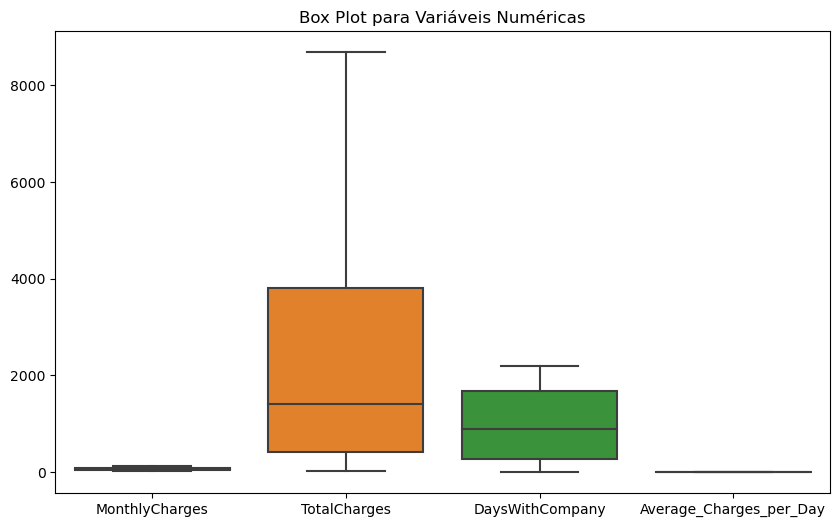

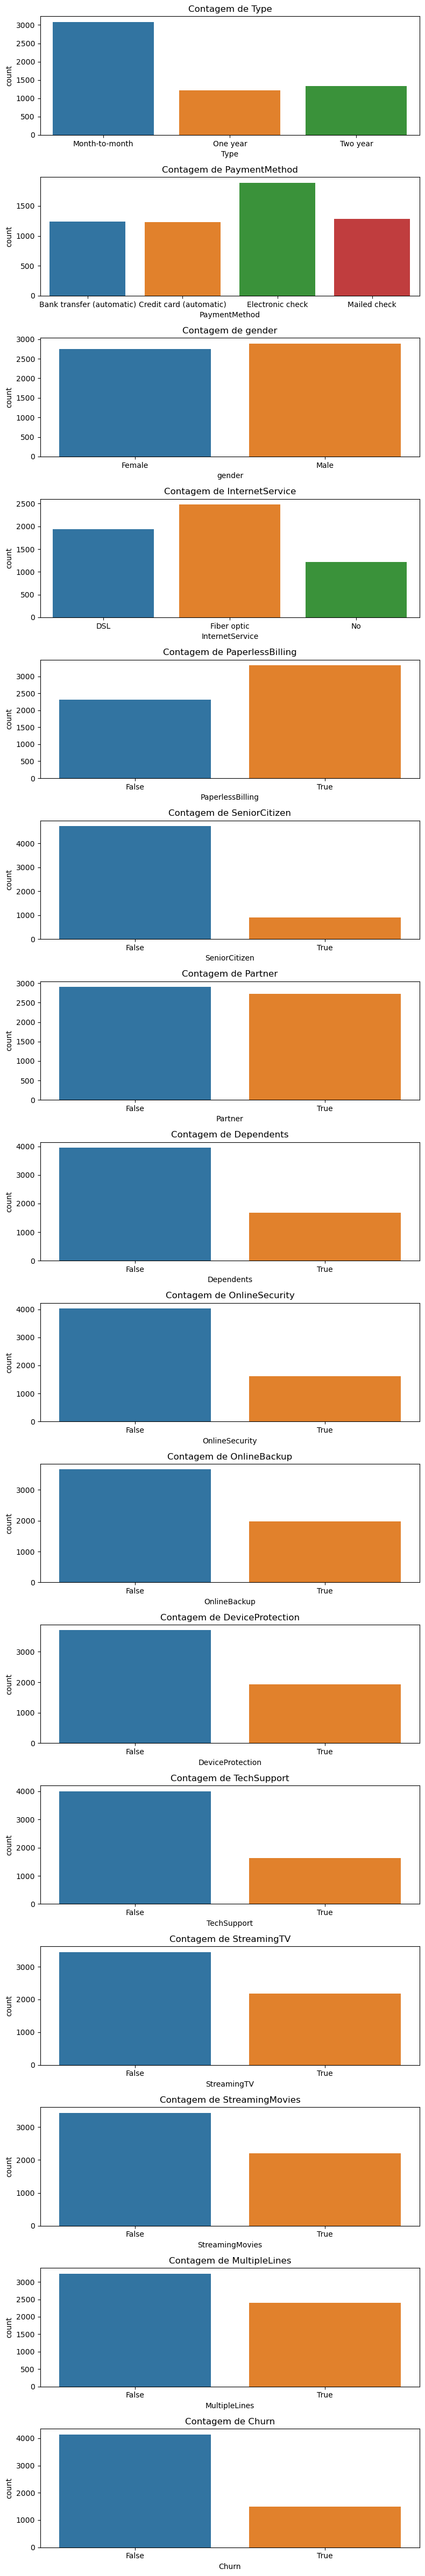

In [20]:
numeric_cols = [
    'MonthlyCharges', 'TotalCharges', 'DaysWithCompany',
    'Average_Charges_per_Day'
]
categorical_cols = ['Type', 'PaymentMethod', 'gender', 'InternetService']
binary_cols = [
    'PaperlessBilling', 'SeniorCitizen', 'Partner', 'Dependents',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Churn'
]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_eda[numeric_cols])
plt.title('Box Plot para Variáveis Numéricas')
plt.show()

# Gráficos de contagem para variáveis categóricas e binárias
fig, axes = plt.subplots(len(categorical_cols) + len(binary_cols),
                         1,
                         figsize=(8, 6 * ((len(categorical_cols) / 2) +
                                          (len(binary_cols) / 2))))

for i, col in enumerate(categorical_cols + binary_cols):
    ax = axes[i]
    sns.countplot(data=df_eda, x=col, ax=ax)
    ax.set_title(f'Contagem de {col}')

plt.tight_layout()
plt.show()

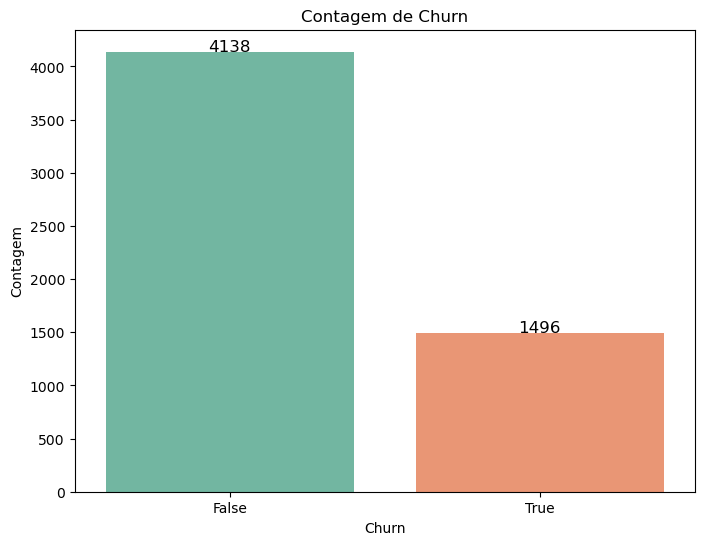

A taxa geral de Churn dos clientes é: 26.55%


In [21]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df_eda, x='Churn', palette="Set2")

plt.title('Contagem de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 5,
            f'{int(p.get_height())}',
            ha='center',
            fontsize=12,
            color='black')

plt.show()
print(
    f"A taxa geral de Churn dos clientes é: {((df_eda['Churn'] == True).sum() / len(df_eda) * 100):.2f}%"
)

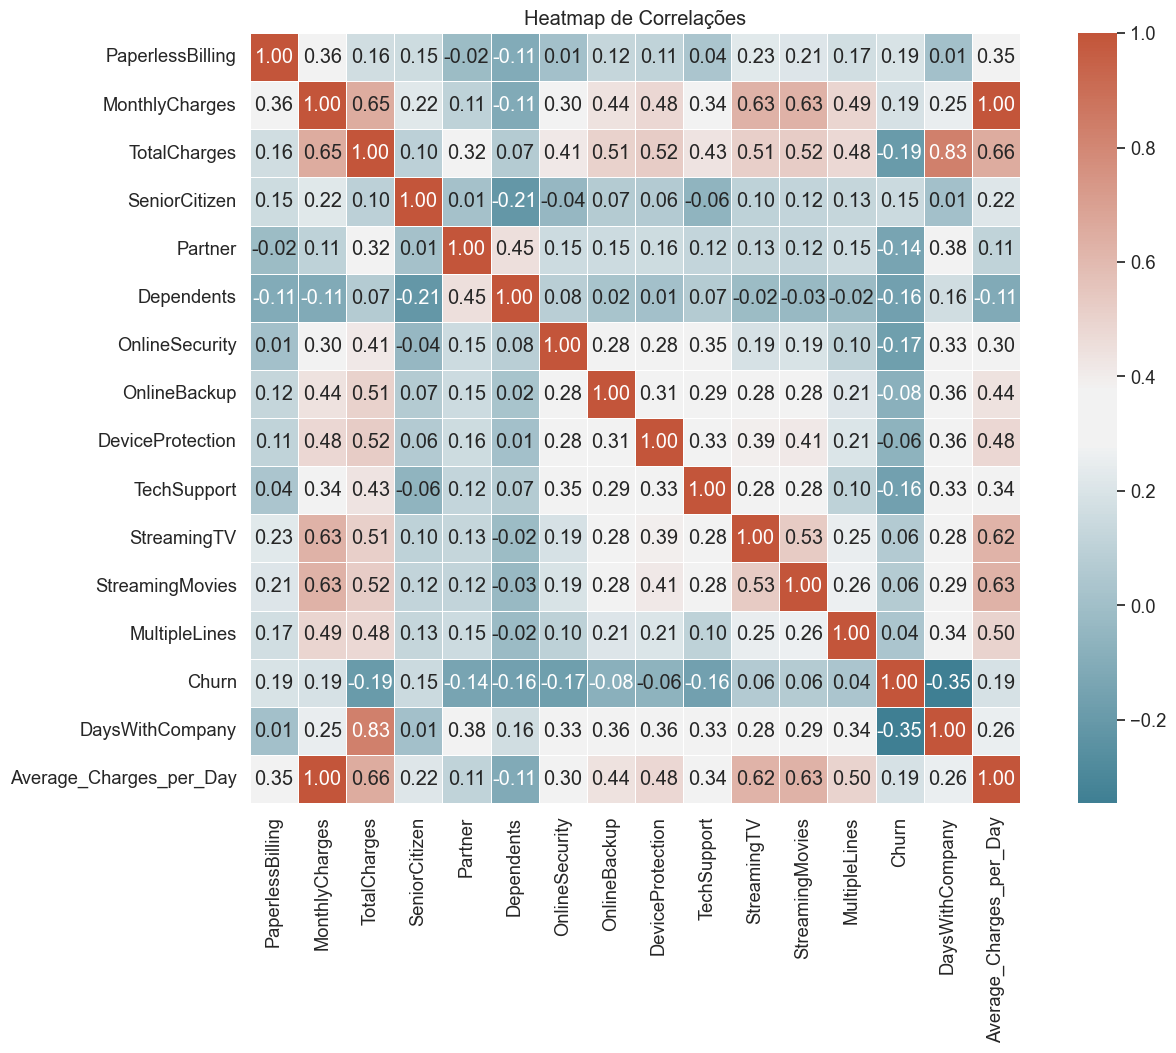

In [22]:
correlation_matrix = df_eda.corr(numeric_only=True)

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.2)
sns.set_style("whitegrid")

cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      fmt=".2f",
                      cmap=cmap,
                      linewidths=0.5,
                      square=True)

plt.title("Heatmap de Correlações")

plt.show()

Quando um cliente sai (`Churn` = 1), a variável `DaysWithCompany` tende a ser menor. Ou seja, normalmente, clientes novos tendem a ter uma taxa de `Churn` maior.

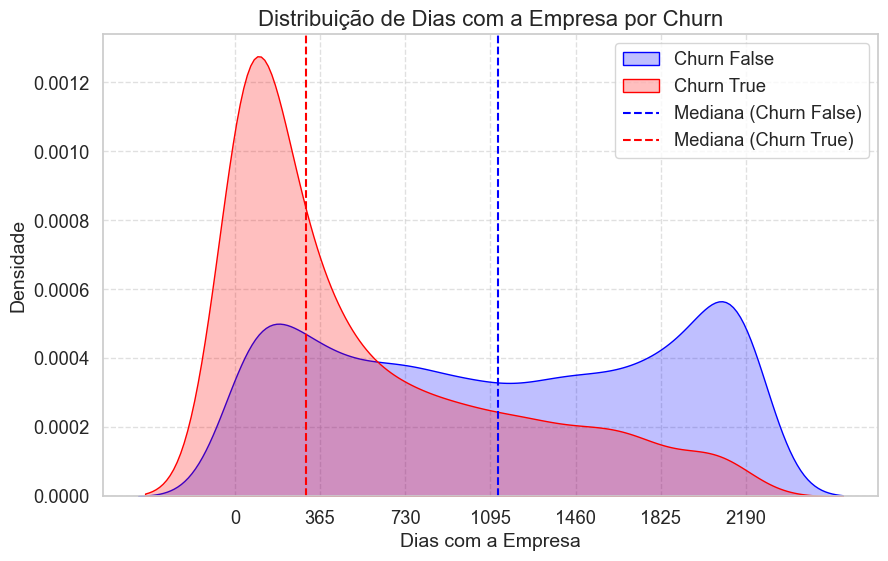

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_eda[df_eda['Churn'] == 0]['DaysWithCompany'],
            label='Churn False',
            fill=True,
            color='blue')
sns.kdeplot(data=df_eda[df_eda['Churn'] == 1]['DaysWithCompany'],
            label='Churn True',
            fill=True,
            color='red')

plt.xlabel("Days with Company", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribuição de Dias com a Empresa por Churn", fontsize=16)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.axvline(x=df_eda[df_eda['Churn'] == 0]['DaysWithCompany'].median(),
            color='blue',
            linestyle='--',
            label='Mediana (Churn False)')
plt.axvline(x=df_eda[df_eda['Churn'] == 1]['DaysWithCompany'].median(),
            color='red',
            linestyle='--',
            label='Mediana (Churn True)')

plt.xlabel("Dias com a Empresa", fontsize=14)
plt.ylabel("Densidade", fontsize=14)

plt.xticks(range(0, df_eda['DaysWithCompany'].max() + 1, 365))

plt.legend()
plt.show()

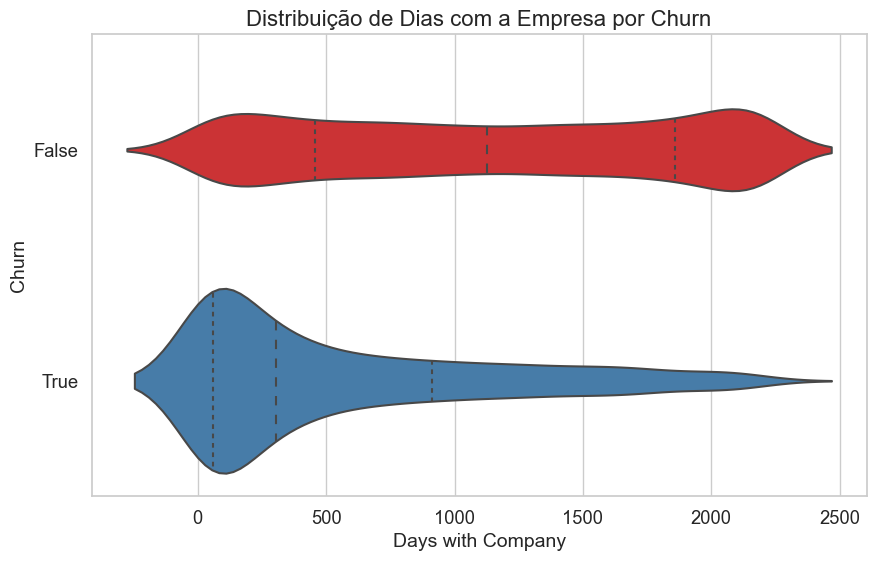

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="DaysWithCompany",
               y="Churn",
               data=df_eda,
               inner="quartiles",
               palette="Set1",
               orient="h")

plt.xlabel("Days with Company", fontsize=14)
plt.ylabel("Churn", fontsize=14)
plt.title("Distribuição de Dias com a Empresa por Churn", fontsize=16)

plt.show()

Podemos observar que o terceiro quartil, Q3, está posicionado abaixo de 1.000 dias. Isso indica que 75% do Churn ocorre antes que o cliente complete 2 anos e 7 meses de relacionamento com a empresa. Além disso, é notável que mais de 50% dos clientes realizam o Churn em menos de 500 dias de relacionamento com a empresa. Portanto, podemos inferir que contratos com duração superior a 1 ano tendem a aumentar a taxa de retenção dos clientes.

In [25]:
# Vamos deixar filtrado os clientes que realizaram o Churn para usarmos em futuras análises
churn_df_eda = df_eda[df_eda['Churn'] == True]

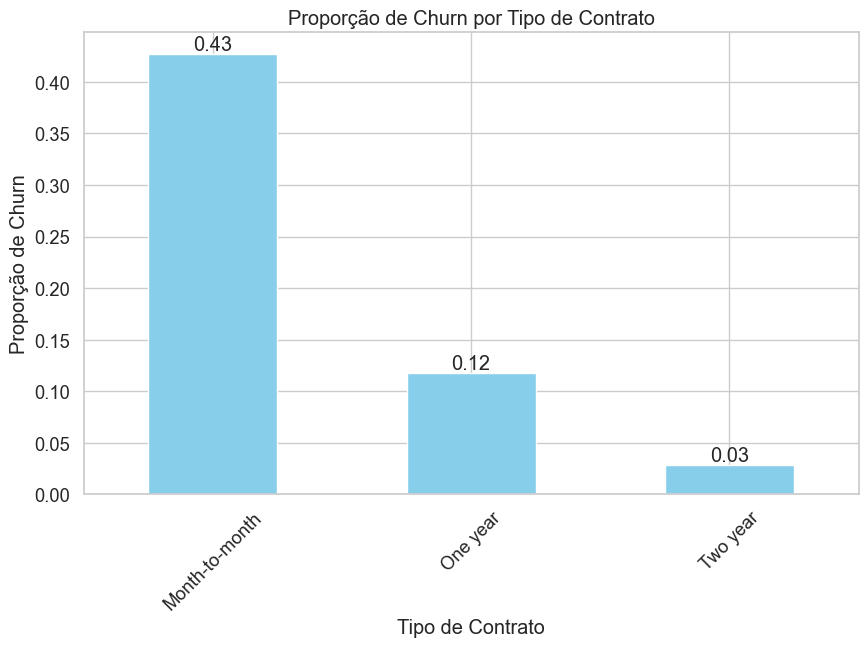

Type
Month-to-month    0.426533
One year          0.117987
Two year          0.028379
Name: Churn, dtype: float64

In [26]:
# Calcular a proporção de Churn em relação ao número total de clientes para cada tipo
churn_proportion = churn_df_eda.groupby(
    'Type')['Churn'].count() / df_eda.groupby('Type')['Churn'].count()

plt.figure(figsize=(10, 6))
ax = churn_proportion.plot(kind='bar', color='skyblue')
plt.title('Proporção de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporção de Churn')
plt.xticks(rotation=45)

for i, v in enumerate(churn_proportion):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()
churn_proportion

Pode-se observar que a taxa de churn é, de fato, significativamente mais elevada em contratos de menor duração. Portanto, considera-se vantajoso a implementação de incentivos para encorajar os clientes a optarem por contratos mais longos. Por exemplo, a taxa de retenção de clientes em contratos de 2 anos é de 97%, enquanto em contratos de 1 ano é de 88%. Isso confirma a nossa inferência de que contratos com duração de um ano ou mais têm o potencial de aumentar a taxa de retenção de clientes.

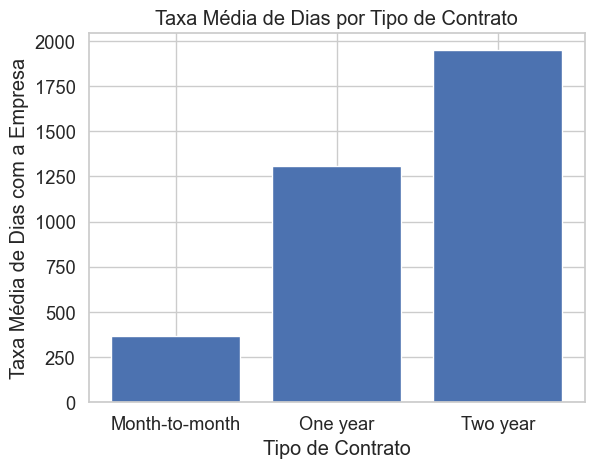

Churn,Type,False,True
0,Month-to-month,488.0,242.0
1,One year,1310.0,1492.0
2,Two year,1949.0,1902.5


In [27]:
# Calcula a taxa média de dias por tipo de contrato
average_days = df_eda.groupby('Type')['DaysWithCompany'].median().reset_index()

plt.bar(average_days['Type'], average_days['DaysWithCompany'])
plt.xlabel('Tipo de Contrato')
plt.ylabel('Taxa Média de Dias com a Empresa')
plt.title('Taxa Média de Dias por Tipo de Contrato')
plt.show()

# Calcula a taxa média de dias por tipo de contrato e por churn
df_eda.groupby(['Type',
                'Churn'])['DaysWithCompany'].median().unstack().reset_index()

Observamos que os clientes com uma menor duração média de permanência tendem a optar pelo plano de pagamento mensal. Além disso, notamos que os contratos parecem estar eficazes, com uma taxa de retenção de clientes superior àquela do plano de pagamento mensal. Também identificamos um grupo de clientes no plano de pagamento mensal com uma média de permanência de 242 dias que ainda não realizaram o churn, o que sugere que podem ser clientes recém-adquiridos.

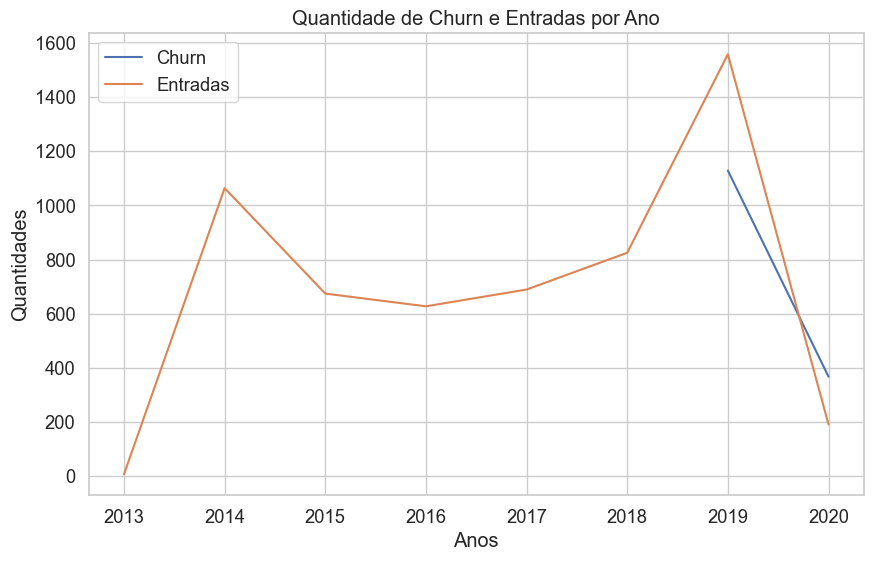

In [28]:
temp_df = df_eda.copy()

temp_df['EndDate'] = pd.to_datetime(temp_df['EndDate'], errors='coerce')

temp_df['Churn'] = temp_df['EndDate'].dt.year
temp_df['Entries'] = temp_df['BeginDate'].dt.year

temp_df_churn = temp_df['Churn'].value_counts().sort_index()
temp_df_entries = temp_df['Entries'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(temp_df_churn.index, temp_df_churn.values, label='Churn')
plt.plot(temp_df_entries.index, temp_df_entries.values, label='Entradas')
plt.xlabel('Anos')
plt.ylabel('Quantidades')
plt.title('Quantidade de Churn e Entradas por Ano')
plt.legend()
plt.grid(True)
plt.show()

As saídas começaram a ser registradas a partir de novembro de 2019, sugerindo uma possível falha na coleta de dados ou a inexistência de saídas anteriores a esse período. Isso levanta a possibilidade de que os clientes que realizaram o churn tenham tido uma menor duração de relacionamento com a empresa. Portanto, é plausível inferir que os novos clientes estejam contribuindo para o aumento das ocorrências de churn. Outras hipóteses a considerar incluem problemas técnicos na coleta de dados ou questões problemáticas no fornecimento dos serviços.

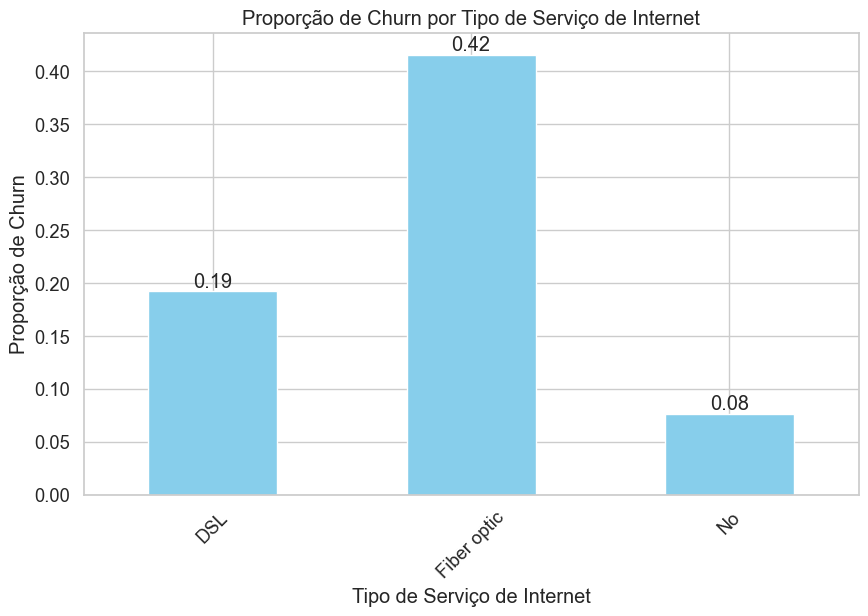

InternetService
DSL            0.191851
Fiber optic    0.415558
No             0.076606
Name: Churn, dtype: float64

In [29]:
# Calcular a proporção de Churn em relação ao número total de clientes para cada tipo de serviço de internet
churn_proportion = churn_df_eda.groupby('InternetService')['Churn'].count(
) / df_eda.groupby('InternetService')['Churn'].count()

plt.figure(figsize=(10, 6))
ax = churn_proportion.plot(kind='bar', color='skyblue')
plt.title('Proporção de Churn por Tipo de Serviço de Internet')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Proporção de Churn')
plt.xticks(rotation=45)

for i, v in enumerate(churn_proportion):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()
churn_proportion

O serviço de fibra óptica possui um alto índice de churn, atingindo 42%. Isso significa que apenas 58% dos clientes que adquirem esse serviço permanecem como clientes da empresa. Esses números sugerem a possibilidade de problemas na qualidade do serviço, uma vez que o serviço de DSL, que é considerado tecnologicamente inferior à fibra óptica, apresenta uma taxa de churn significativamente menor, de 19%. Além disso, os clientes que não possuem nenhum tipo de serviço de internet registram uma taxa de churn de apenas 8%.

Essa situação é motivo de preocupação para o setor de internet, pois indica que a retenção de clientes no segmento de fibra óptica é desafiadora. A empresa deve considerar investigar e resolver as possíveis causas desse alto índice de churn, a fim de melhorar a qualidade do serviço e manter a satisfação dos clientes.

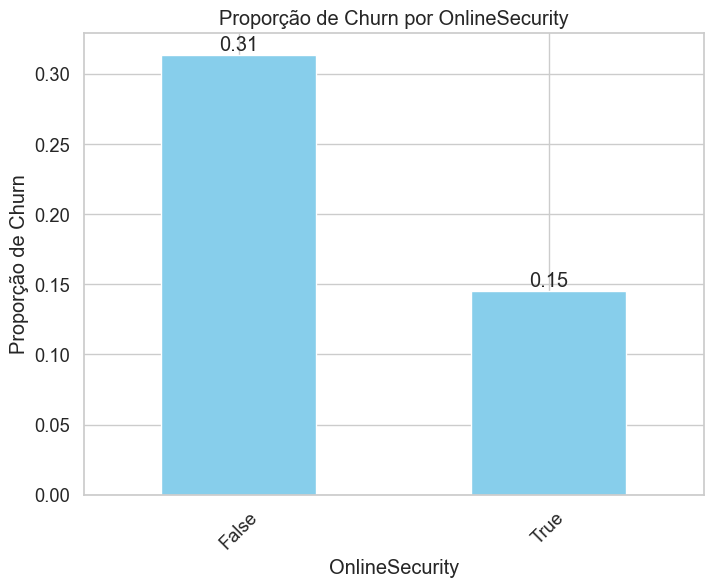

OnlineSecurity
False    0.313618
True     0.145342
Name: Churn, dtype: float64


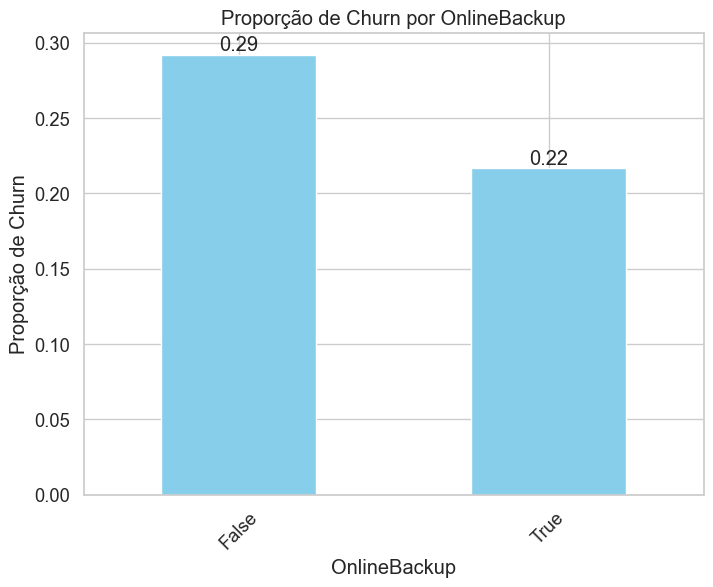

OnlineBackup
False    0.291917
True     0.216531
Name: Churn, dtype: float64


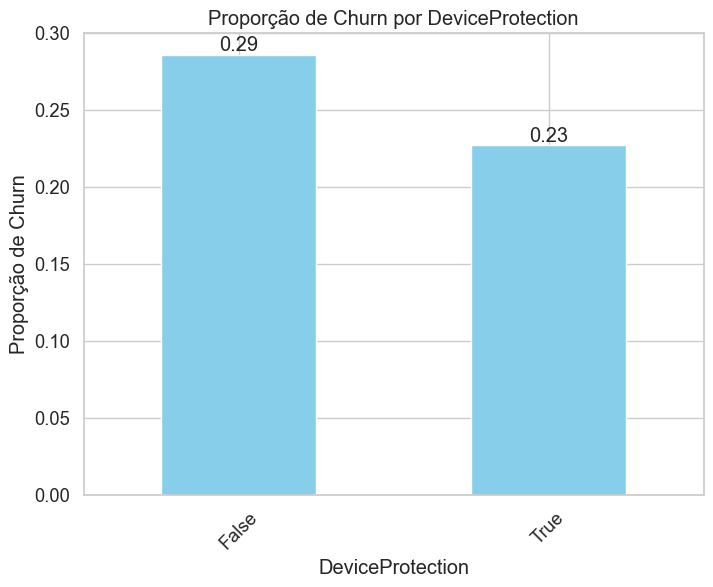

DeviceProtection
False    0.285714
True     0.226825
Name: Churn, dtype: float64


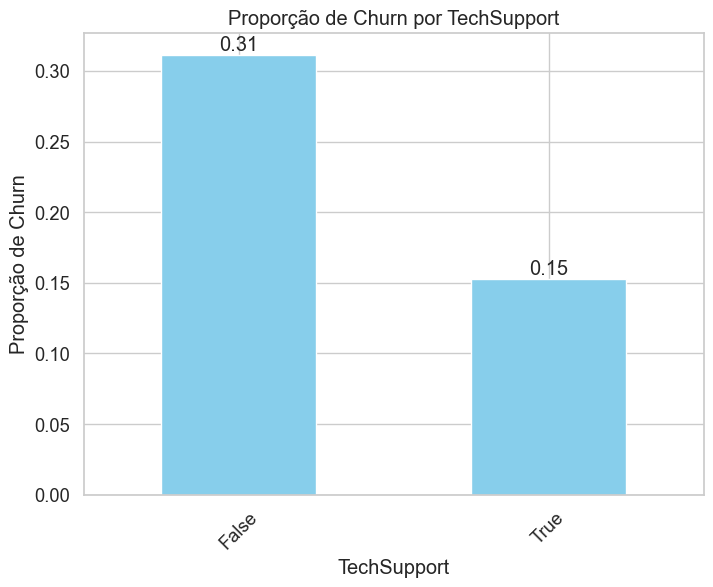

TechSupport
False    0.311361
True     0.152855
Name: Churn, dtype: float64


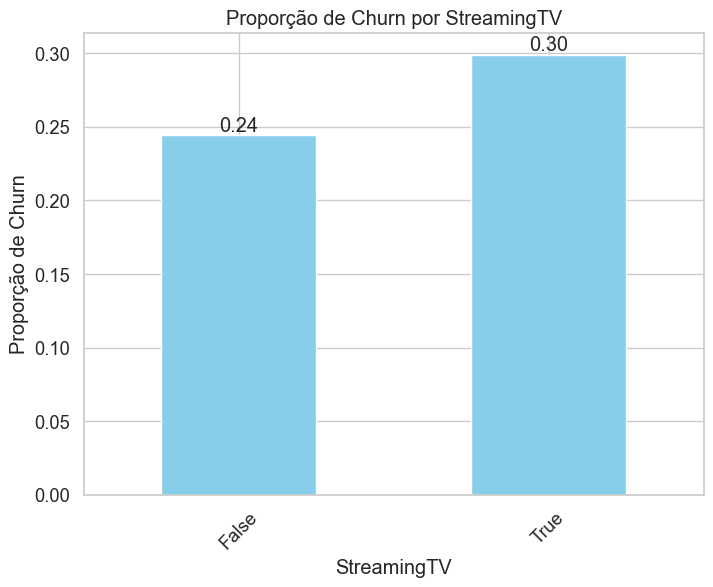

StreamingTV
False    0.244425
True     0.298945
Name: Churn, dtype: float64


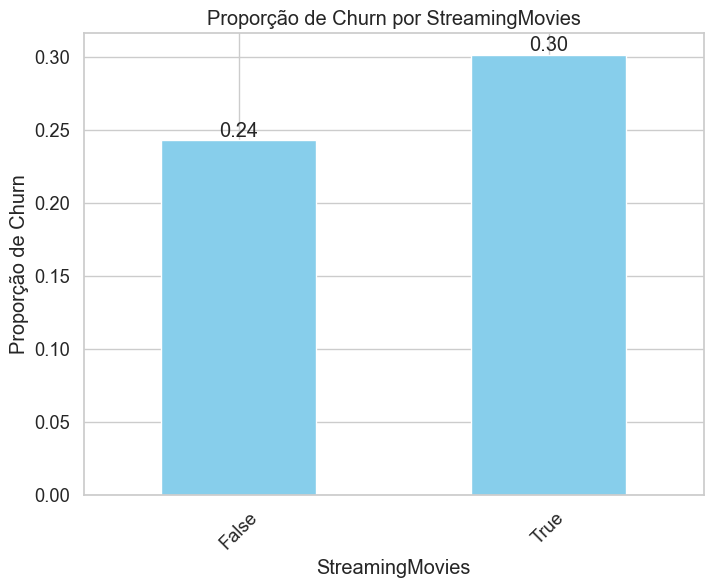

StreamingMovies
False    0.242653
True     0.301320
Name: Churn, dtype: float64


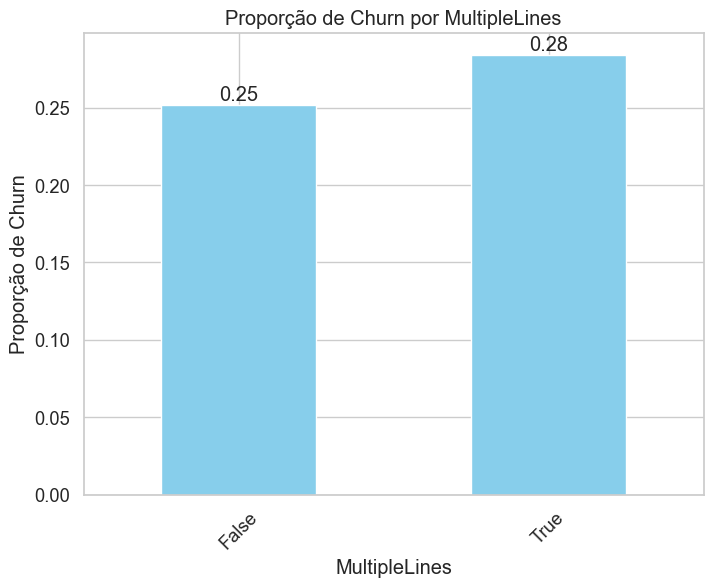

MultipleLines
False    0.251776
True     0.284105
Name: Churn, dtype: float64


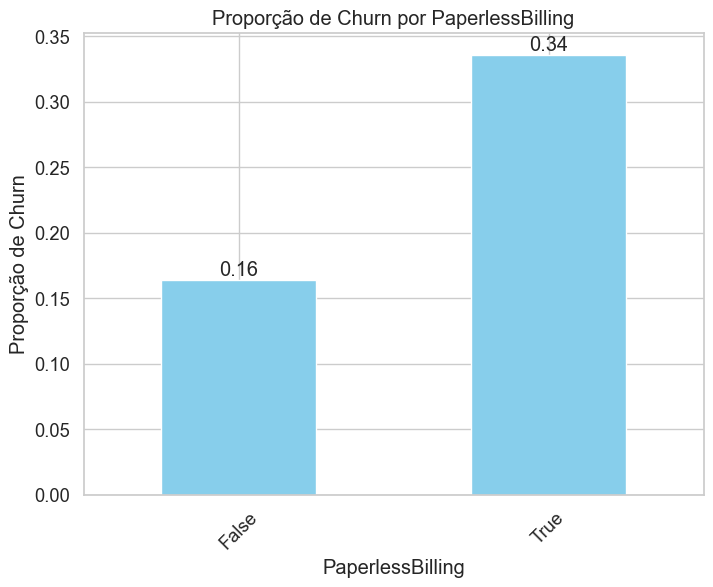

PaperlessBilling
False    0.16414
True     0.33594
Name: Churn, dtype: float64


In [30]:
# Loop através das colunas e calcule a proporção de Churn
for column in [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines','PaperlessBilling'
]:
    # Calcular a proporção de Churn em relação ao número total de clientes para cada tipo de serviço
    proportion = churn_df_eda.groupby(
        column)['Churn'].count() / df_eda.groupby(column)['Churn'].count()

    plt.figure(figsize=(8, 6))
    ax = proportion.plot(kind='bar', color='skyblue')
    plt.title(f'Proporção de Churn por {column}')
    plt.xlabel(column)
    plt.ylabel('Proporção de Churn')
    plt.xticks(rotation=45)

    for i, v in enumerate(proportion):
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

    plt.show()
    print(proportion)

No geral, os resultados indicam que a presença de determinados serviços, tais como `Online Security`, `Online Backup`, `Device Protection` e `Tech Support`, está relacionada com uma reduzida probabilidade de churn por parte dos clientes em relação à empresa. Por outro lado, a presença de serviços de streaming, como `Streaming TV` e `Streaming Movies,` e a de várias linhas telefônicas `Multiple Lines` parece estar associada a uma taxa mais elevada de churn entre os clientes que utilizam esses serviços. Isso sugere a possibilidade de problemas nos serviços de streaming, que podem estar resultando em maior churn entre os usuários desses serviços, em comparação com aqueles que não os utilizam.

Para aumentar a retenção de clientes, seria aconselhável considerar a elaboração de ofertas que incluam os serviços com maior taxa de retenção de clientes, como `Tech Support` e `Online Security`. Vale ressaltar que todos esses serviços possuem uma base de usuários menor em comparação com aqueles que não utilizam esses serviços, o que levanta preocupações sobre a qualidade dos serviços que apresentam taxas mais elevadas de churn.

Por fim, observamos um elevado nível de Churn entre os clientes que adotam o sistema de faturação eletrônica `PaperlessBilling`. Esta situação é preocupante, uma vez que a maioria dos nossos clientes utiliza este serviço.

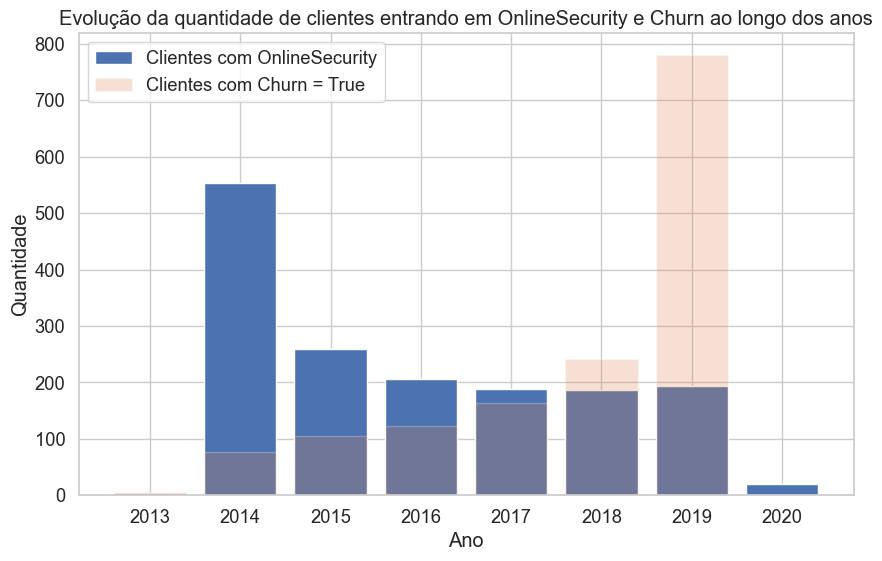

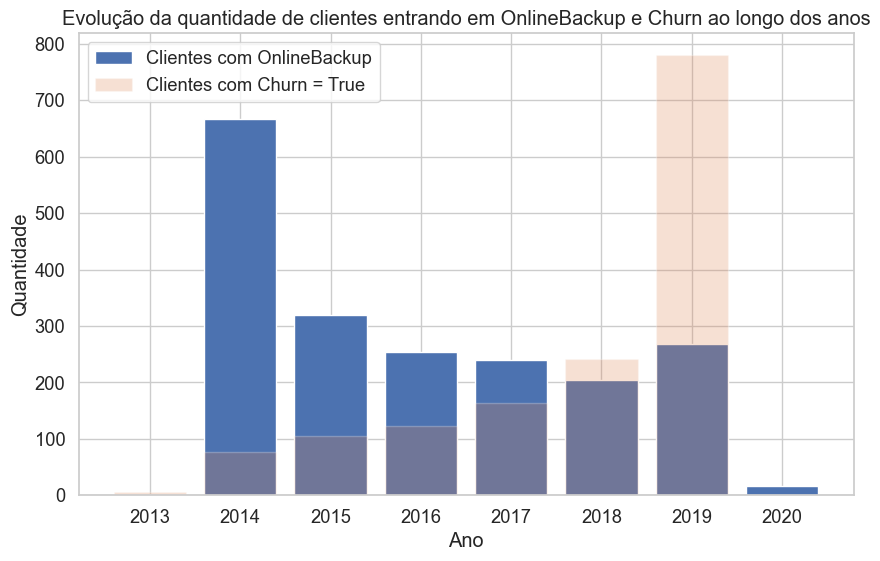

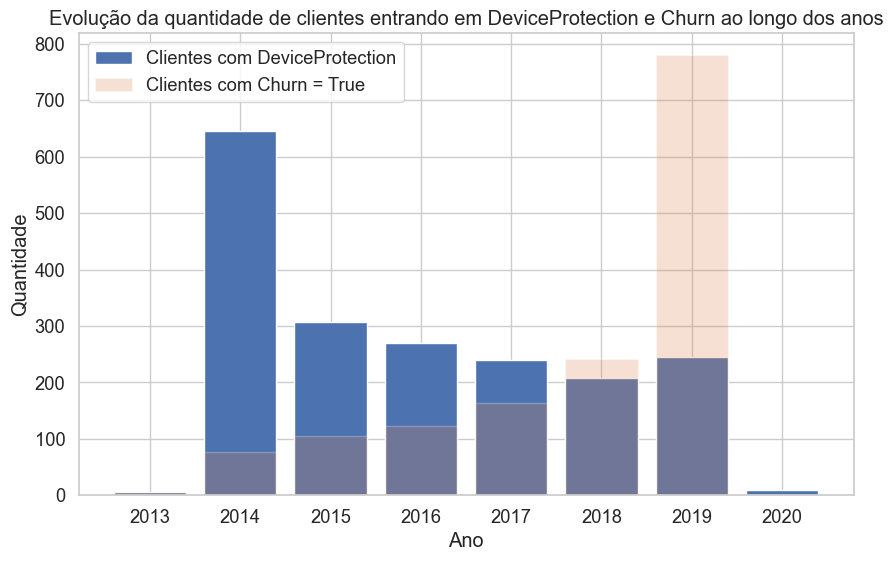

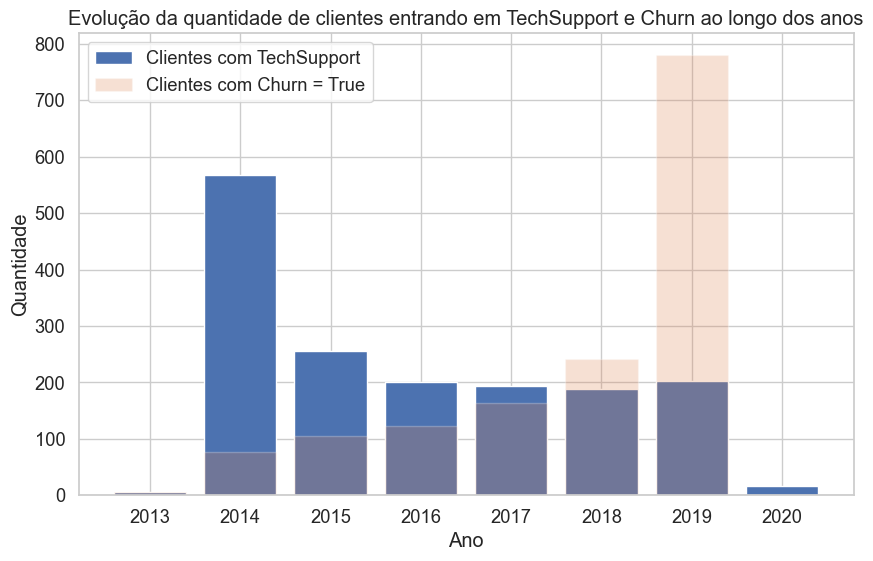

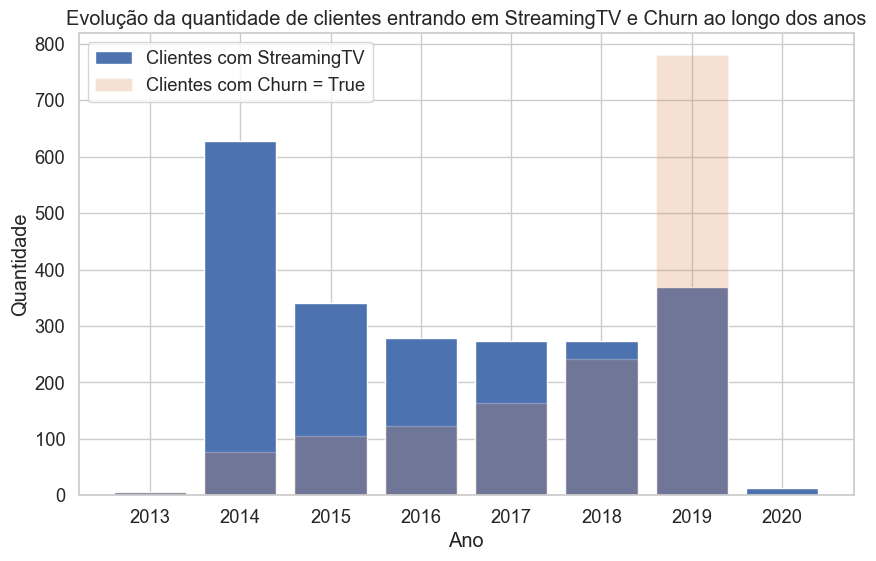

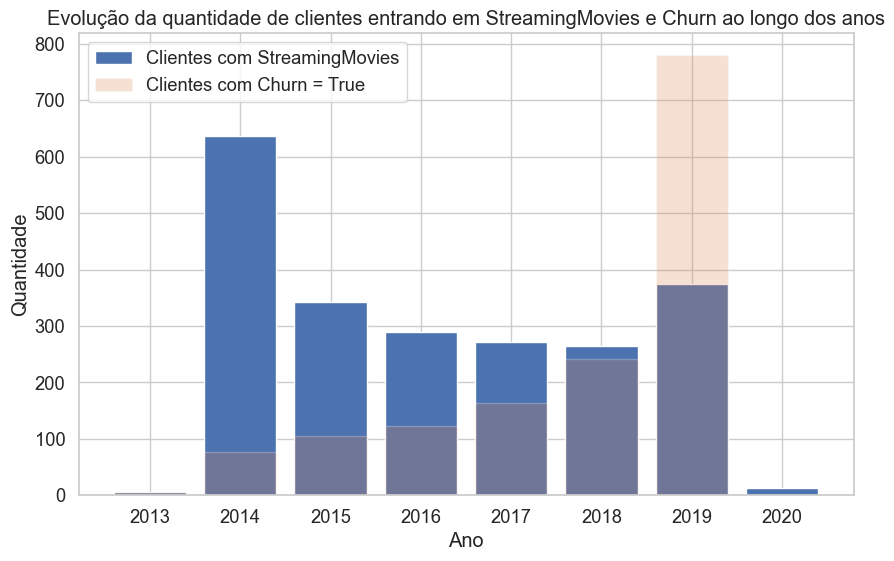

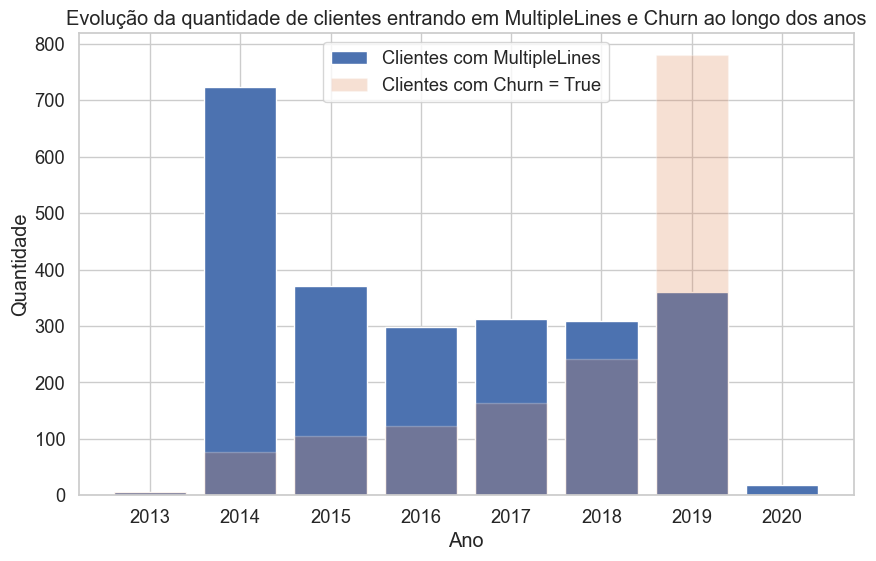

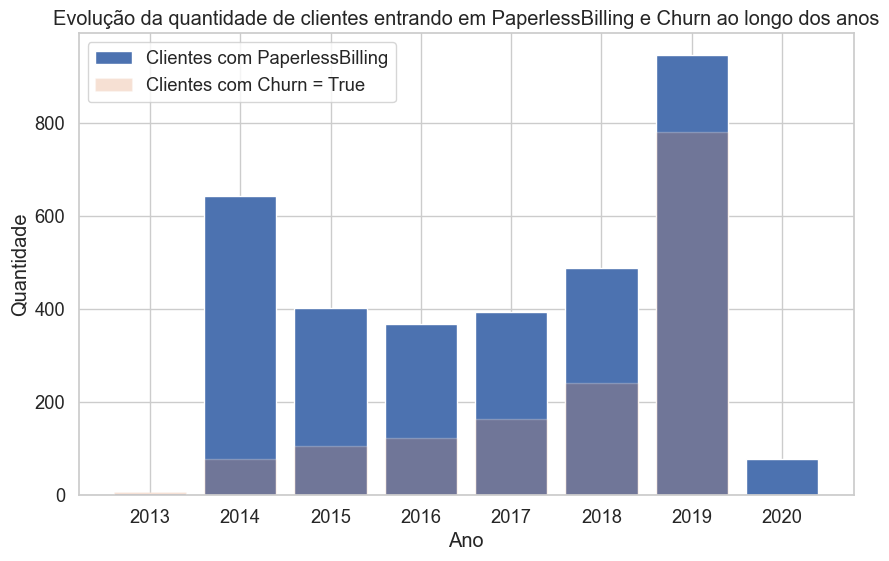

In [31]:
def plot_customer_evolution(df, column_name):
    df_copy = df.copy()
    df_copy['Year'] = df_copy['BeginDate'].dt.year

    data_by_year = df_copy[df_copy[column_name] == True].groupby('Year').size()
    data_churn_by_year = df_copy[df_copy['Churn'] == True].groupby(
        'Year').size()

    plt.figure(figsize=(10, 6))
    plt.bar(data_by_year.index,
            data_by_year.values,
            label=f'Clientes com {column_name}')
    plt.bar(data_churn_by_year.index,
            data_churn_by_year.values,
            label='Clientes com Churn = True',
            alpha=0.25)
    plt.xlabel('Ano')
    plt.ylabel('Quantidade')
    plt.title(
        f'Evolução da quantidade de clientes entrando em {column_name} e Churn ao longo dos anos'
    )
    plt.grid(True)
    plt.legend()
    plt.show()


columns_to_plot = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'MultipleLines', 'PaperlessBilling'
]

for column in columns_to_plot:
    plot_customer_evolution(df_eda, column)

Pode-se observar que a maior incidência de Churn provém de clientes que se tornaram assinantes em 2019. Além disso, constatamos anteriormente que a taxa mais elevada de Churn ocorre entre os clientes que optam pelo serviço `PaperlessBilling`. Notavelmente, a adesão a esse serviço atingiu seu pico em 2019. Portanto, seria pertinente iniciar uma conversa com a empresa para compreender as circunstâncias que envolveram esse aumento na adesão em 2019 e como isso se relaciona com a taxa de Churn.

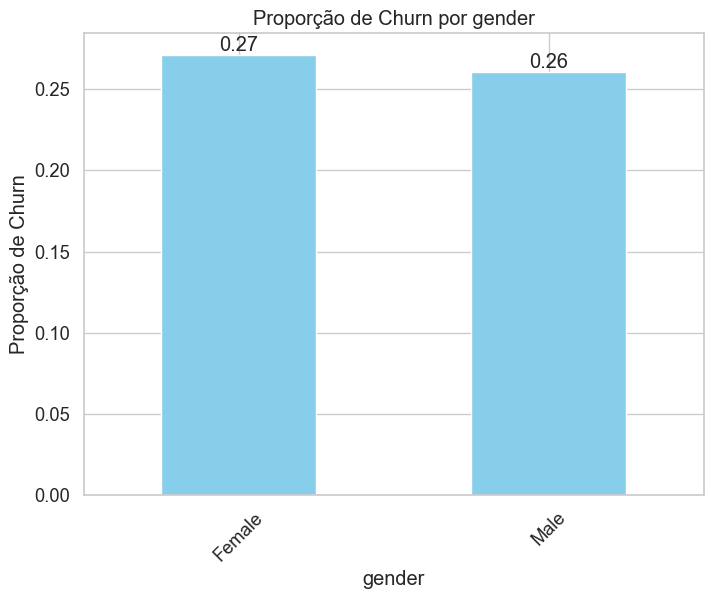

gender
Female    0.270841
Male      0.260478
Name: Churn, dtype: float64


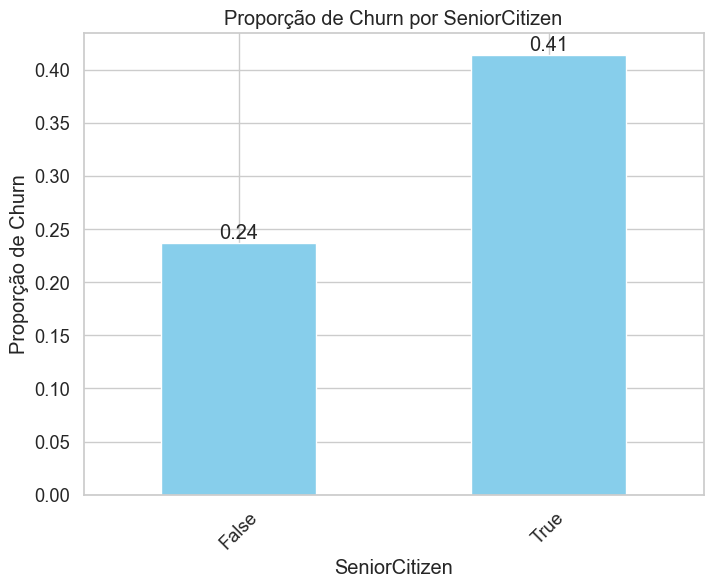

SeniorCitizen
False    0.237098
True     0.413907
Name: Churn, dtype: float64


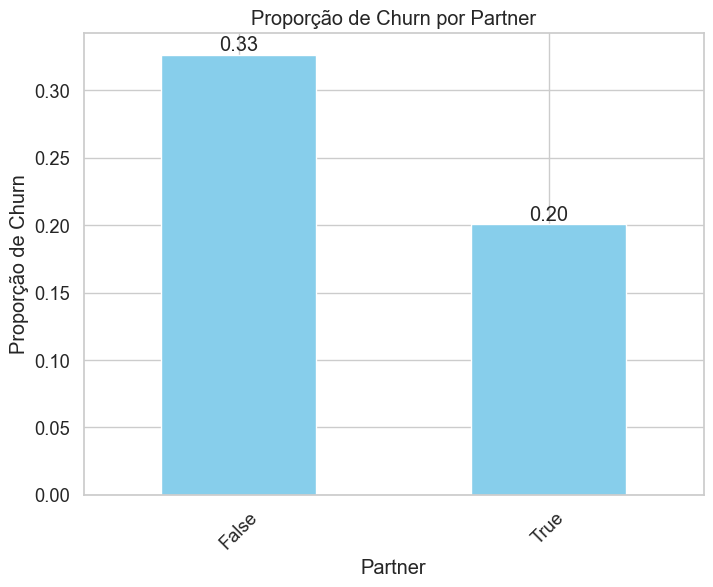

Partner
False    0.326446
True     0.200733
Name: Churn, dtype: float64


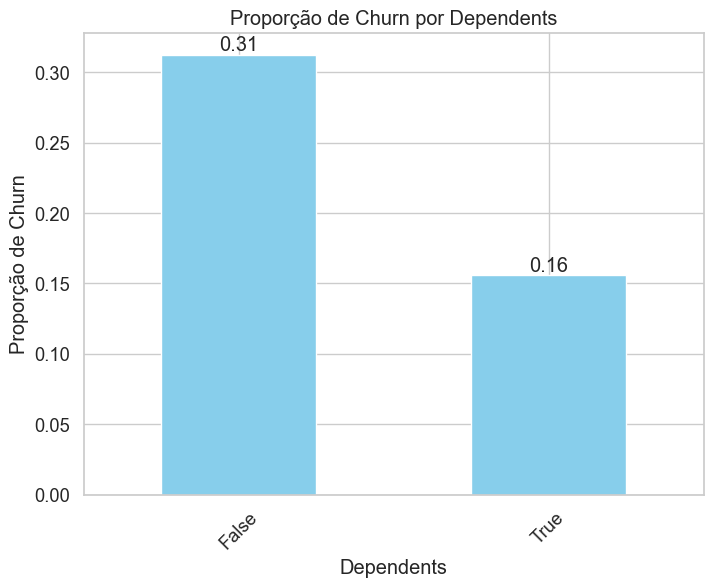

Dependents
False    0.312326
True     0.155674
Name: Churn, dtype: float64


In [32]:
# Loop através das colunas e calcule a proporção de Churn
for column in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    # Calcular a proporção de Churn em relação ao número total de clientes para cada tipo de cliente
    proportion = churn_df_eda.groupby(
        column)['Churn'].count() / df_eda.groupby(column)['Churn'].count()

    plt.figure(figsize=(8, 6))
    ax = proportion.plot(kind='bar', color='skyblue')
    plt.title(f'Proporção de Churn por {column}')
    plt.xlabel(column)
    plt.ylabel('Proporção de Churn')
    plt.xticks(rotation=45)

    for i, v in enumerate(proportion):
        ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

    plt.show()
    print(proportion)

No geral, observamos uma taxa de Churn semelhante para ambos os sexos. No entanto, notamos uma taxa de Churn significativamente mais alta entre os clientes idosos. Isso pode ser atribuído à probabilidade de que eles possuam mais serviços, como multiplas linhas e serviços de Streaming. Além disso, os clientes que têm parceiros apresentam uma taxa de Churn inferior em comparação com aqueles que não têm parceiros, possivelmente devido à maior estabilidade que um relacionamento pode oferecer, seguindo o "mesmo" seguimento notamos uma taxa muito baixa de Churn entre os clientes que possuem dependentes. No entanto, é importante ressaltar que o número de clientes com dependentes é substancialmente menor em comparação com aqueles que não possuem dependentes. Isso sugere que pode ser benéfico para a empresa desenvolver estratégias para atrair mais clientes com dependentes.

Além disso, é fundamental analisar quais serviços esses clientes com dependentes mais possuem, a fim de adaptar as ofertas e promoções de acordo com suas necessidades e preferências.

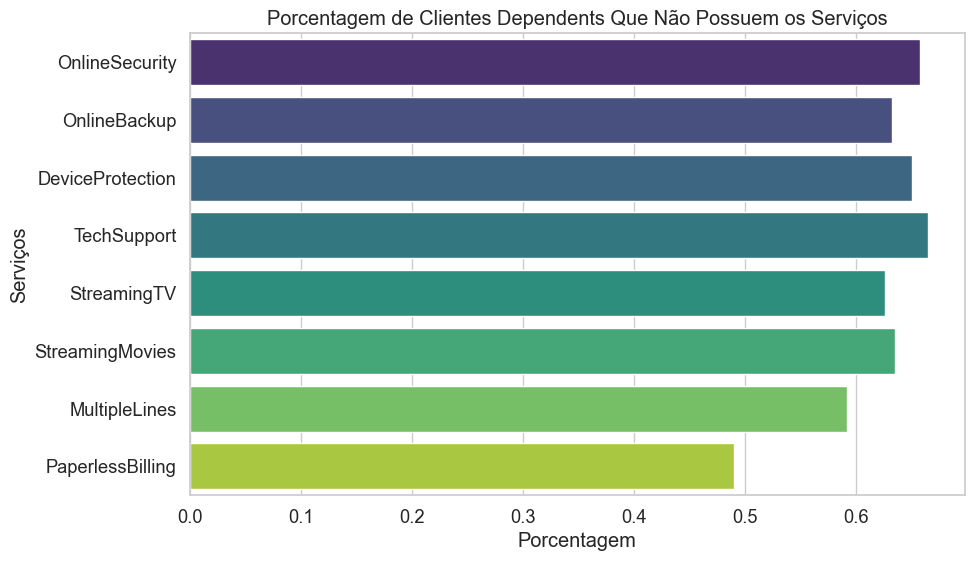

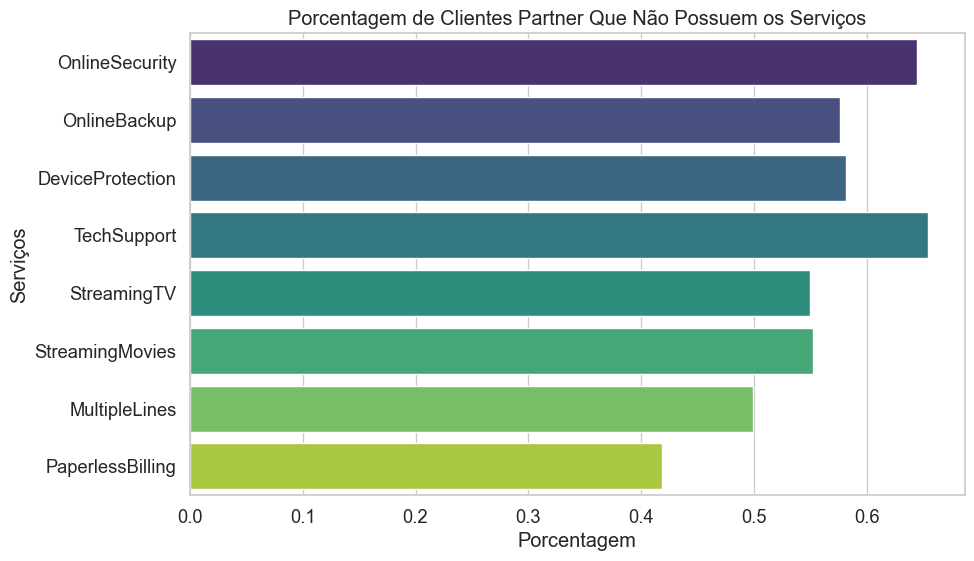

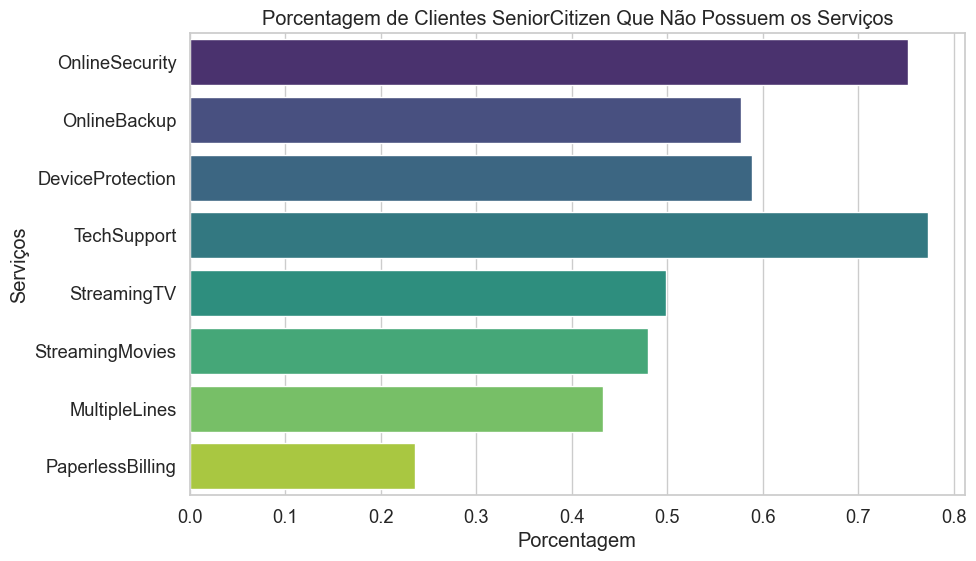

In [33]:
def plot_service_percentages(df, condition):
    filtered_df = df[df[condition] == True]

    services_columns = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines','PaperlessBilling'
    ]

    service_counts = filtered_df[services_columns].eq(False).sum() / len(
        filtered_df)

    service_counts_df = pd.DataFrame({
        'Service': service_counts.index,
        'Percentagem': service_counts.values
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Percentagem',
                y='Service',
                data=service_counts_df,
                palette='viridis')
    plt.xlabel('Porcentagem')
    plt.ylabel('Serviços')
    plt.title(f'Porcentagem de Clientes {condition} Que Não Possuem os Serviços')
    plt.show()


plot_service_percentages(df_eda, 'Dependents')
plot_service_percentages(df_eda, 'Partner')
plot_service_percentages(df_eda, 'SeniorCitizen') 

Observa-se que mais de 60% dos clientes que possuem dependentes não fazem uso da maioria destes serviços. O comportamento dos clientes que possuem parceiros é semelhante ao dos que têm dependentes com uma excessão principal ao serviço de multiplas linhas, ao contrário do grupo de idosos, que demonstra uma taxa de adesão mais elevada aos serviços de streaming, como já havíamos sugerido anteriormente. Esse fenômeno pode explicar a elevada taxa de Churn entre esses clientes, uma vez que esses serviços são os que exibem as maiores taxas de Churn. Além disso, mais de 70% dos clientes que se encaixam nesse perfil optam por não adquirir serviços com taxas de retenção superiores, tais como o `OnlineSecurity` e o `TechSupport`.

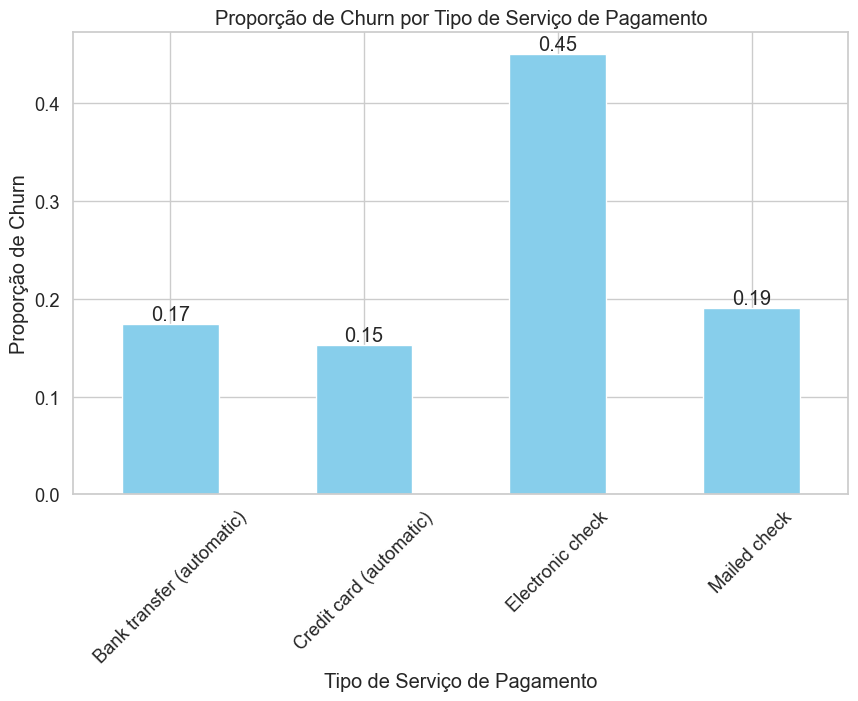

PaymentMethod
Bank transfer (automatic)    0.174475
Credit card (automatic)      0.152404
Electronic check             0.449921
Mailed check                 0.190328
Name: Churn, dtype: float64

In [34]:
# Calcular a proporção de Churn em relação ao número total de clientes para cada tipo de serviço de pagamento
churn_proportion = churn_df_eda.groupby('PaymentMethod')['Churn'].count(
) / df_eda.groupby('PaymentMethod')['Churn'].count()

plt.figure(figsize=(10, 6))
ax = churn_proportion.plot(kind='bar', color='skyblue')
plt.title('Proporção de Churn por Tipo de Serviço de Pagamento')
plt.xlabel('Tipo de Serviço de Pagamento')
plt.ylabel('Proporção de Churn')
plt.xticks(rotation=45)

for i, v in enumerate(churn_proportion):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()
churn_proportion

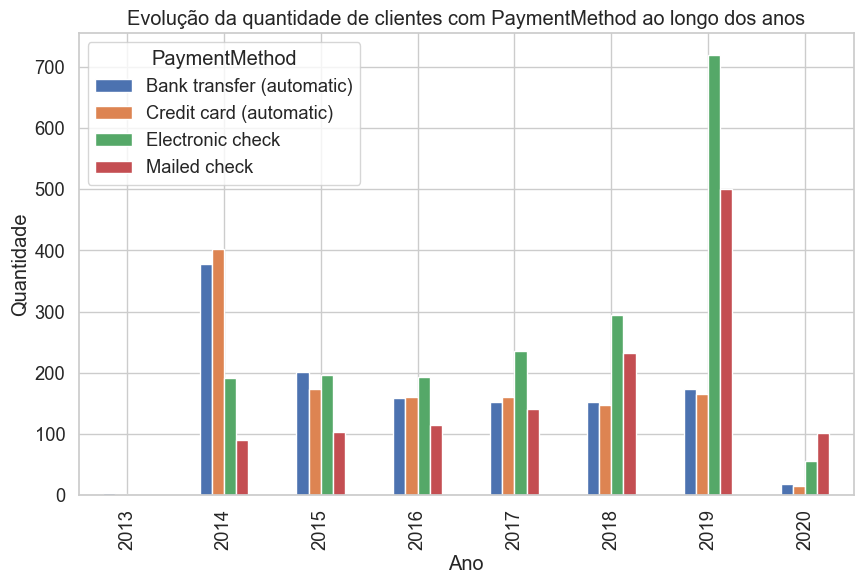

In [35]:
df_copy = df_eda.copy()
df_copy['Year'] = df_copy['BeginDate'].dt.year

column_name = 'PaymentMethod'

data_by_year = df_copy[df_copy[column_name].notnull()].groupby(
    ['Year', column_name])[column_name].count().unstack()

data_by_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title(
    f'Evolução da quantidade de clientes com {column_name} ao longo dos anos')
plt.grid(True)
plt.legend(title=column_name)
plt.show()

Vimos que as maiores taxas de churn estão associadas aos serviços de pagamento `Electronic check` (Cheque Eletrônico) e `Mailed Check` (Cheque Enviado pelo Correio). Além disso, é observado que a maior adoção desses serviços ocorreu no ano de 2019. Nesse contexto, é imprescindível questionar a empresa sobre os fatores que influenciaram significativamente o uso desses métodos de pagamento em 2019, sobretudo no que diz respeito ao `Electronic check`, que exibe uma taxa de churn alarmante de 45%.

A análise aponta que os casos envolvendo o `Electronic check` e a opção de `PaperlessBilling` aparentam ser os principais impulsionadores do churn na empresa.

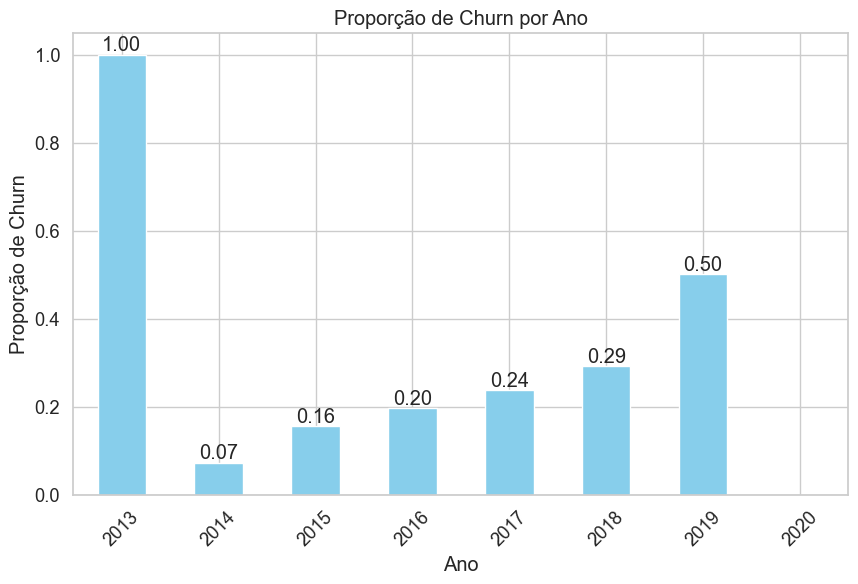

BeginDate
2013    1.000000
2014    0.072368
2015    0.155786
2016    0.196172
2017    0.238026
2018    0.292121
2019    0.500321
2020         NaN
Name: Churn, dtype: float64

In [36]:
churn_proportion = churn_df_eda['Churn'].groupby(
    churn_df_eda['BeginDate'].dt.year).count() / df_eda['Churn'].groupby(
        df_eda['BeginDate'].dt.year).count()

plt.figure(figsize=(10, 6))
churn_proportion.plot(kind='bar', color='skyblue')
plt.title('Proporção de Churn por Ano')
plt.xlabel('Ano')
plt.ylabel('Proporção de Churn')
plt.xticks(rotation=45)

for i, v in enumerate(churn_proportion):
    if np.isfinite(v):
        plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()
churn_proportion

Podemos observar que 100% dos clientes de 2013 apresentaram o Churn, enquanto 50% dos clientes de 2019 também registraram o Churn. Essas taxas são preocupantes, especialmente no caso de 2019, uma vez que esses clientes foram adquiridos recentemente, tornando a taxa ainda mais alarmante.

## Conclusão da EDA:

1. **Duração do Contrato**: Ficou claro que a duração do contrato desempenha um papel crucial na taxa de Churn. Clientes com contratos mais longos demonstraram uma retenção mais forte em comparação com os contratos mensais. Isso sugere a importância de incentivar os clientes a adotar contratos de maior duração, talvez por meio de ofertas e descontos atraentes.

2. **Serviços Oferecidos**: A presença de determinados serviços, como `Online Security`, e `Tech Support`, está associada a uma menor probabilidade de churn. Por outro lado, serviços de streaming, como `Streaming TV` e `Streaming Movies,` que estão ligados a uma taxa mais alta de churn. Para melhorar a retenção de clientes, a empresa pode considerar a criação de pacotes que incluam os serviços com alta taxa de retenção. No entanto, a análise também destaca a necessidade de investigar e resolver possíveis problemas de qualidade em serviços de streaming. A retenção de clientes no segmento de fibra óptica é desafiadora. A empresa deve considerar investigar e resolver as possíveis causas desse alto índice de churn, a fim de melhorar a qualidade do serviço e manter a satisfação dos clientes.

3. **Adesão ao `PaperlessBilling`**: A análise destaca uma realção entre a adesão ao serviço `PaperlessBilling` (Faturamento Eletrônico) em 2019 e uma alta taxa de churn. Isso sugere a necessidade de entender as razões por trás desse aumento na adesão em 2019 e como isso se relaciona com a taxa de churn. Pode ser necessário revisar a implementação do serviço para garantir a satisfação dos clientes.

4. **Características Demográficas dos Clientes**: A análise demográfica destaca que clientes mais velhos apresentam uma taxa de Churn mais elevada, possivelmente devido à posse de mais serviços de streaming. A presença de parceiros está associada a uma taxa de Churn mais baixa, e clientes com dependentes têm uma taxa muito baixa de Churn. Isso aponta para a oportunidade de atrair mais clientes com dependentes e personalizar ofertas de acordo com suas necessidades.

5. **Métodos de Pagamento**:O método de pagamento `Electronic check` está fortemente associado a uma alta taxa de churn em 2019. A empresa deve investigar a fundo os fatores que contribuem para essa taxa de Churn alarmante, incluindo possíveis problemas na experiência do cliente ou nos processos relacionados a esses métodos de pagamento.

6. **Dados Temporais**: A observação de que a coleta de dados de saída começou em novembro de 2019 indica uma possível falha na coleta de dados ou a ausência de saídas anteriores. Isso levanta a hipótese de que novos clientes possam estar impulsionando o aumento do Churn. Essa questão requer investigação mais aprofundada para entender as causas subjacentes do Churn. Temos 50% dos clientes de 2019 registrando o Churn. Essa taxa é preocupante, uma vez que esses clientes foram adquiridos recentemente.

Em resumo, a análise oferece uma base sólida para a Interconnect desenvolver uma estratégia proativa e informada. A empresa pode implementar ações como promoções para contratos de maior duração, aprimoramento dos serviços de streaming, investigação das razões por trás do aumento da adesão ao `PaperlessBilling` em 2019, adaptação de estratégias para diferentes grupos demográficos de clientes e resolução dos problemas relacionados ao método de pagamento `Electronic check` e ao serviço de `Fiber optic` Essas medidas têm o potencial de melhorar significativamente a retenção de clientes, aumentar a satisfação e, consequentemente, a lucratividade da empresa.

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

## Feature Engineering

In [37]:
def Feature_Engineering(df):
    """
    1 - Criação de uma coluna 'Begin_Year' com base no ano de 'BeginDate'.
    2 - Criação de uma coluna 'Services_Retention' que indica se o cliente tem algum serviço que possui menos taxa de Churn.
    3 - Criação de uma coluna 'Streaming' que indica se o cliente tem algum serviço de streaming ativo.
    4 - Criação de uma coluna 'Months' que indica quantos meses o cliente esteve ativo pela quantidade de pagamentos mensais.
    5 - Remoção das colunas que não são significantes para os modelos.
    """
    df['Begin_Year'] = df['BeginDate'].dt.year

    df['Services_Retention'] = df[['TechSupport',
                                   'OnlineSecurity']].any(axis=1)

    df['Streaming'] = df[['StreamingTV', 'StreamingMovies']].any(axis=1)

    df['Months_in_Company'] = round(df['TotalCharges'] /
                         df['MonthlyCharges']).astype('int64')

    df.drop(['BeginDate', 'EndDate', 'customerID'], axis=1, inplace=True)

    return df


df_train = Feature_Engineering(df_train)
df_test = Feature_Engineering(df_test)

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Type                5634 non-null   category
 1   PaperlessBilling    5634 non-null   bool    
 2   PaymentMethod       5634 non-null   category
 3   MonthlyCharges      5634 non-null   float64 
 4   TotalCharges        5634 non-null   float64 
 5   gender              5634 non-null   category
 6   SeniorCitizen       5634 non-null   bool    
 7   Partner             5634 non-null   bool    
 8   Dependents          5634 non-null   bool    
 9   InternetService     5634 non-null   category
 10  OnlineSecurity      5634 non-null   bool    
 11  OnlineBackup        5634 non-null   bool    
 12  DeviceProtection    5634 non-null   bool    
 13  TechSupport         5634 non-null   bool    
 14  StreamingTV         5634 non-null   bool    
 15  StreamingMovies     5634 non-null   

## Modelagem

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, roc_auc_score

def build_and_cross_validate_with_preprocessing(X, y, model, param_grid, cv=5):
    # Identificando as colunas numéricas e categóricas do DataFrame
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['category']).columns

    # Definindo transformadores para features numéricas
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Preenche valores ausentes com a média
        ('scaler', StandardScaler())  # Padroniza os valores
    ])

    # Definindo transformadores para features categóricas
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Preenche valores ausentes com o valor mais frequente
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Realiza codificação one-hot
    ])

    # Criando um ColumnTransformer para aplicar as transformações apropriadas às features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Criando um pipeline que aplica as etapas de pré-processamento e o modelo de classificação
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])

    # Criando um scorer personalizado para a pontuação AUC-ROC
    auc_roc_scorer = make_scorer(roc_auc_score)

    # Criando uma validação cruzada estratificada
    cv_stratified = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Realizando uma busca em grade para otimizar hiperparâmetros
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=auc_roc_scorer, cv=cv_stratified)
    grid_search.fit(X, y)
    
    return grid_search

# Separando as features e o target do conjunto de treinamento
features_train = df_train.drop(['Churn'], axis=1)
target_train = df_train['Churn']

# Definindo os hiperparâmetros para otimização
param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],  
    'classifier__max_depth': [3, 4, 5]
}

# Criando um modelo XGBoost
model = XGBClassifier()  

# Realizando a otimização e validação cruzada com pré-processamento
grid_search_result = build_and_cross_validate_with_preprocessing(features_train, target_train, model, param_grid)

# Imprimindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search_result.best_params_)

# Imprimindo a melhor pontuação AUC-ROC
print("Melhor pontuação AUC-ROC no conjunto de treinamento:", grid_search_result.best_score_)

# Separando as features e o target do conjunto de teste
features_test = df_test.drop(['Churn'], axis=1)
target_test = df_test['Churn']

# Realizando previsões no conjunto de teste
predictions = grid_search_result.predict(features_test)

# Calculando a pontuação AUC-ROC no conjunto de teste
auc_roc_score_test = roc_auc_score(target_test, predictions)

# Imprimindo a pontuação AUC-ROC no conjunto de teste
print("Pontuação AUC-ROC no conjunto de teste:", auc_roc_score_test)

Melhores hiperparâmetros: {'classifier__max_depth': 4, 'classifier__n_estimators': 100}
Melhor pontuação AUC-ROC no conjunto de treinamento: 0.7523668118503302
Pontuação AUC-ROC no conjunto de teste: 0.7876641961762605


<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

## Conclusão

Construimos um pipeline de machine learning com pré-processamento de dados, otimização de hiperparâmetros e validação cruzada.

A meta estabelecida para a pontuação AUC-ROC foi alcançada, com um valor de 0.787 no conjunto de teste, o que está dentro da faixa desejada de 0.75 ≤ AUC-ROC < 0.81.

<div class="alert alert-block alert-info">
<b>Comentário geral do instrutor e do tutor</b> <a class="tocSkip"></a>

OK.
</div>

## Questões a responder!

**1- Quais passos do plano foram executados e quais foram pulados (explique por que)?**

- Pré-processamento de Dados
- Análise Exploratória de Dados (EDA)
- Feature Engineering
- Modelagem Preditiva

Todos os passos do plano foram realizados, mas de maneira mais eficiente e focada devido às restrições de tempo, priorizando as tarefas mais essenciais e relevantes para alcançar os objetivos do projeto.

**2- Quais dificuldades você encontrou e como conseguiu resolvê-las?**

- Encontrei dificuldade em compreender a origem das inconsistências nos dados. Para superar esse obstáculo, analisei os dataframes separadamente

- Inicialmente, tive dificuldade em decidir por onde começar na análise exploratória de dados. Para superar isso, decidi por iniciar com análises mais simples e gerais. À medida que ganhava insights e compreendia melhor o conjunto de dados, fui aprofundando nas análises, explorando detalhes específicos nos dataframes e identificando padrões relevantes.

- A criação de novas features para os dataframes apresentou dificuldades. Para superar esse obstáculo, utilizei as conclusões obtidas na análise exploratória de dados como orientação. Isso me ajudou a identificar as características necessárias para melhorar o desempenho do modelo. No entanto, tomei cuidado para evitar a criação de features que vazassem informações do target, mantendo a integridade do processo.

- Evitar o vazamento de dados durante a modelagem foi um dos desafios mais significativos. Para lidar com isso foi tentei realizar o que foi passado em aula pelo professor Felipe.

**3- Quais foram algumas das etapas principais de resolução da tarefa?**

Das etapas planejadas, destaco duas como as principais em minha opinião: o **Pré-processamento de Dados** e a **Análise Exploratória de Dados**.

**4- Qual é seu modelo final e qual pontuação de qualidade ele tem?**

**Modelo Final:** XGBoost Classifier

**Pontuações de Qualidade:**
- Conjunto de Treino: 0.7523...
- Conjunto de Teste: 0.7876...